In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import random
import numpy as np
import pandas as pd

import scipy.stats as stats


In [2]:
df = pd.read_csv('data.csv', parse_dates=['created_date'])

In [3]:
cleaned = df[df['created_date'] > '2017-12-31']
cleaned = cleaned[cleaned['cycle_time_days'] > -1]


project_0_cycle_times = cleaned[cleaned['grp'] == 0].cycle_time_days
project_1_cycle_times = cleaned[cleaned['grp'] == 1].cycle_time_days

project_0_cycle_times = project_0_cycle_times.values
project_1_cycle_times = project_1_cycle_times.values

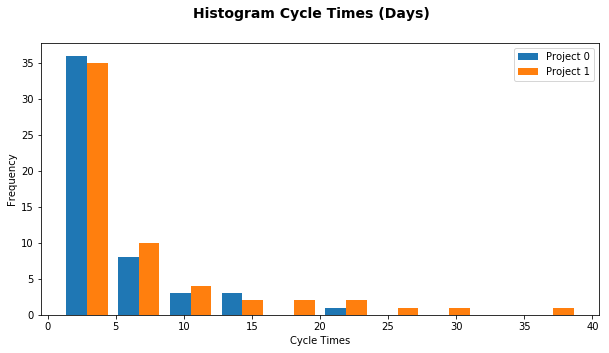

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Histogram Cycle Times (Days)', fontsize=14, fontweight='bold')
plt.hist([project_0_cycle_times, project_1_cycle_times], label=['Project 0', 'Project 1'])
ax.set_xlabel('Cycle Times')
ax.set_ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

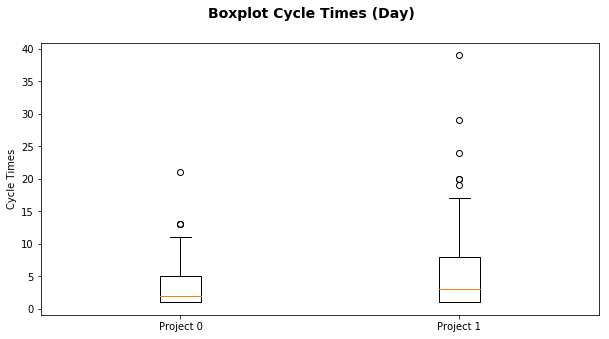

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Boxplot Cycle Times (Day)', fontsize=14, fontweight='bold')

plt.boxplot([project_0_cycle_times, project_1_cycle_times])

ax.set_xticklabels(['Project 0', 'Project 1'])
ax.set_ylabel('Cycle Times')


plt.show()

In [6]:
print(stats.describe(project_0_cycle_times))
print(stats.describe(project_1_cycle_times))

DescribeResult(nobs=51, minmax=(1, 21), mean=3.7058823529411766, variance=17.931764705882351, skewness=2.0789642149745884, kurtosis=4.474217402617895)
DescribeResult(nobs=58, minmax=(1, 39), mean=6.3275862068965516, variance=61.2416817906836, skewness=2.146885333051502, kurtosis=4.8044881900831315)


In [7]:
print(stats.variation(project_0_cycle_times))
print(stats.variation(project_1_cycle_times))

1.13140945001
1.22605206929


In [8]:
def simulate(max_work_items, cycle_times, selector, itearions):
    out = []
    
    for i in range(itearions):
        out.append(run_iteration(max_work_items, cycle_times, selector))
        
    return np.transpose(out)

def run_iteration(max_work_items, cycle_times, selector):
    total = [0]
    for i, e in enumerate(range(max_work_items)):
            total.append(selector(cycle_times))
    return total 

def cumulative_sum_row_wise(a):
    return np.cumsum(a, 0)



In [9]:
max_work_items = 10
iterations = 100

In [10]:
range_work_items = np.array([x for x in range(max_work_items + 1)])
range_work_items

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
s = simulate(max_work_items, project_0_cycle_times, np.random.choice, iterations)
s

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  6, ...,  2,  1,  7],
       [13,  2,  3, ...,  6,  2,  1],
       ..., 
       [ 2,  4,  1, ..., 13,  3,  5],
       [ 1,  5,  3, ...,  5,  1,  1],
       [ 1,  1,  2, ...,  1,  1,  5]])

In [12]:
c = cumulative_sum_row_wise(s)
c

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  6, ...,  2,  1,  7],
       [14,  3,  9, ...,  8,  3,  8],
       ..., 
       [29, 30, 32, ..., 30, 27, 32],
       [30, 35, 35, ..., 35, 28, 33],
       [31, 36, 37, ..., 36, 29, 38]])

In [13]:
v_max = cumulative_sum_row_wise([max(project_0_cycle_times) for i in range(max_work_items)])
v_max = np.insert(v_max, 0, 0)
v_max

array([  0,  21,  42,  63,  84, 105, 126, 147, 168, 189, 210])

In [14]:
v_min = cumulative_sum_row_wise([min(project_0_cycle_times) for i in range(max_work_items)])
v_min = np.insert(v_min, 0, 0)
v_min

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

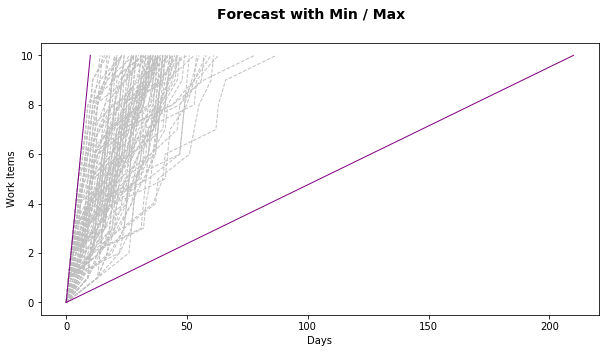

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))


fig.suptitle('Forecast with Min / Max', fontsize=14, fontweight='bold')

plt.plot(c, range_work_items, color='silver', linestyle='dashed', linewidth=1)
plt.plot(v_max, range_work_items, color='purple', linestyle='solid', linewidth=1)
plt.plot(v_min, range_work_items, color='purple', linestyle='solid', linewidth=1)


ax.set_xlabel("Days")
ax.set_ylabel("Work Items")


plt.show()


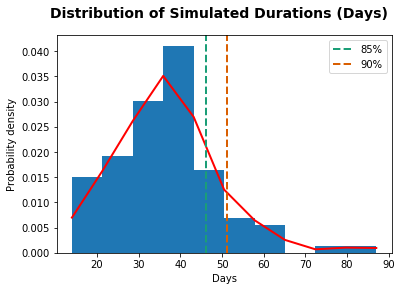

In [49]:

fig, ax = plt.subplots()

fig.suptitle('Distribution of Simulated Durations (Days)', fontsize=14, fontweight='bold')

n, x, _ = plt.hist(c[-1], normed=True)

density = stats.gaussian_kde(c[-1])
plt.plot(x, density(x), color="red", linewidth=2)

ax.set_xlabel('Days')
ax.set_ylabel('Probability density')

p = [85, 90]
q = np.percentile(c[-1], p)

cm = plt.cm.get_cmap('Dark2')

for i, v in enumerate(q):
    plt.axvline(v, color=cm.colors[i], linestyle='dashed', linewidth=2, label=str(p[i]) + '%')

plt.legend(loc='upper right')
plt.show()

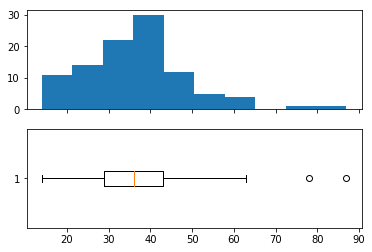

In [74]:

f, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.hist(c[-1])

ax2.boxplot(c[-1], vert=False)
plt.show()

In [143]:
p85 = []
day = 10
for i in range(len(c)):
    p85.append(stats.percentileofscore(c[i], day))

In [144]:
p85

[100.0,
 95.0,
 76.0,
 56.999999999999993,
 37.5,
 22.5,
 14.499999999999998,
 8.0,
 3.5000000000000004,
 0.0,
 0.0]

In [147]:
stats.scoreatpercentile(c[2], 85)

13.149999999999991

In [149]:
c[2]

array([14,  3,  9,  7, 18,  3, 14, 14, 19,  4, 10, 26, 22,  2,  3, 11,  4,
        2,  7,  6,  2,  2, 22, 14, 17,  2, 11,  7,  2,  2,  2,  2,  4, 14,
        2,  2, 17,  4, 10, 10, 10, 10,  2,  6,  6,  2,  3,  3,  2,  2,  6,
        2,  5,  3,  4,  7,  6, 11,  2, 13,  4,  2,  6,  8, 14, 14,  4,  3,
        2, 10,  2,  3,  2,  6,  7, 10,  3,  2,  3,  6,  6,  7, 11,  6, 14,
        2,  5,  2,  3,  5,  2,  6,  2, 10,  2,  2, 10,  8,  3,  8])

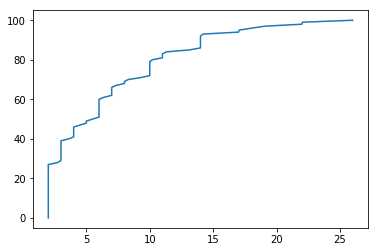

In [167]:
plt.plot(stats.scoreatpercentile(c[2], range(101)), range(101))
plt.show()

In [165]:
stats.scoreatpercentile(c[2], 50)

5.5